<a href="https://colab.research.google.com/github/xiayunj/2020_capstone_Unilever/blob/main/Gloria_FacialDamage_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing
## Step 1: upload images and convert to pixels
## Step 2: for those left face, we flip to obtain all right facing faces.

In [ ]:
import PIL
from PIL import Image
from matplotlib import image
from matplotlib import pyplot

In [ ]:
image_test = Image.open('/content/P0001_FACE_L_S00_VCR_S2_V00D00W00_BEF_REP1_100305_VR06_Ovaled_mask.jpg')
print(image_test.format)
print(image_test.mode)
print(image_test.size)
image_test.show()
# conver to numpy array
# load image as pixel array
data = image.imread('/content/P0001_FACE_L_S00_VCR_S2_V00D00W00_BEF_REP1_100305_VR06_Ovaled_mask.jpg')
print(data.dtype)
print(data.shape)
pyplot.imshow(data)
pyplot.show()
# vertically flip
ver_flip = image_test.transpose(Image.FLIP_LEFT_RIGHT)
pyplot.imshow(ver_flip)
pyplot.show()
# crop image
cropped = ver_flip.crop((200, 0, 1500, 2052))
pyplot.imshow(cropped)
cropped.show()
cropped_gray = cropped.convert('LA')
pyplot.imshow(cropped_gray)
#cropped
data = image.imread(cropped)
#redChannel = cropped(:,:,1);
import numpy
pix_array = numpy.array(cropped)
pix_array[:,:,1]
blue_channel = pix_array[:,:,2]
pix_array[:,:,0]
print(cropped.format)
print(cropped.mode)
print(cropped.size)
blue_img[:,:,2] = blue_channel
blue_img
pyplot.imshow(blue_img)
cropped_hsv = cropped.convert('HSV')

In [ ]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot

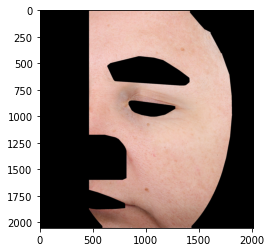

In [ ]:
image = image.imread("/content/drive/My Drive/unilever_images/image_test/P0001_FACE_L_S00_VCR_S2_V00D00W00_BEF_REP1_100305_VR06_Ovaled_mask.jpg")
pyplot.imshow(image)

In [ ]:
# read all images and flip left side face to right side
right_faces = []
for file in glob.glob("/content/drive/My Drive/unilever_images/image_test/*.jpg"): 
  image = cv2.imread(file)

  if (file[62] == 'L'):
    flipped_image = cv2.flip(image, 1);
    right_faces.append(flipped_image)
    cv2.imwrite('/content/drive/My Drive/unilever_images/flipped_test' + file[50:], flipped_image)

  else:
    right_faces.append(image)
    cv2.imwrite('/content/drive/My Drive/unilever_images/flipped_test' + file[50:], image)




In [ ]:
# color processing
# attemp 1: to gray

for filename in glob.glob("/content/drive/My Drive/unilever_images/flipped_test/*.jpg"):
   orig_image = cv2.imread(filename)
   gray = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
   cv2.imwrite("/content/drive/My Drive/unilever_images/gray_test" + filename[52:], gray)

In [ ]:
# attempt 2: to hsv
#HSV, hue range is [0,179], saturation range is [0,255], and value range is [0,255].
hsv_array = []
for filename in glob.glob("/content/drive/My Drive/unilever_images/flipped_test/*.jpg"):
   orig_image = cv2.imread(filename)
   hsv = cv2.cvtColor(orig_image, cv2.COLOR_BGR2HSV)
   hsv_array.append(hsv)
   cv2.imwrite("/content/drive/My Drive/unilever_images/hsv_test" + filename[52:], hsv)

In [ ]:
len(hsv_array)

30

In [ ]:
# attemp 3 remove red channel
#read image
for filename in glob.glob("/content/drive/My Drive/unilever_images/flipped_test/*.jpg"): 
  src = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
  print(src.shape)

# assign red channel to zeros
  src[:,:,2] = np.zeros([src.shape[0], src.shape[1]])

#save image
  cv2.imwrite("/content/drive/My Drive/unilever_images/remove_red_test" + filename[52:], src) 

(2161, 2016, 3)
(2052, 2016, 3)
(2052, 2016, 3)
(2052, 2016, 3)
(2052, 2016, 3)
(2052, 2016, 3)
(2052, 2016, 3)
(2052, 2016, 3)
(2052, 2016, 3)
(2052, 2016, 3)
(2161, 2016, 3)
(2052, 2016, 3)
(2172, 2016, 3)
(2172, 2016, 3)
(2172, 2016, 3)
(2172, 2016, 3)
(2172, 2016, 3)
(2172, 2016, 3)
(2172, 2016, 3)
(2172, 2016, 3)
(2172, 2016, 3)
(2172, 2016, 3)
(2161, 2016, 3)
(2161, 2016, 3)
(2161, 2016, 3)
(2161, 2016, 3)
(2161, 2016, 3)
(2161, 2016, 3)
(2161, 2016, 3)
(2161, 2016, 3)


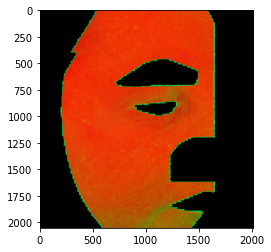

In [ ]:
# transform HSV values
imghsv = image.imread("/content/drive/My Drive/unilever_images/hsv_test/P0001_FACE_R_S00_VCR_S2_V00D00W05_AFT_REP1_100305_VR06_Ovaled_mask.jpg")
pyplot.imshow(imghsv)


In [ ]:
(h, s, v) = cv2.split(imghsv)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

# =======================================================

# Keras Generator to load data
To generate your dataset on multiple cores in real time and feed it right away to your deep learning model.



*   in the original image dataset provided, we will remove 4 images, as they do not have corresponding labels (grades)
P0064_FACE_L_S00_VCR_S2_V00D00W16_AFT_REP1_100305_VR06_Ovaled_mask
P0064_FACE_R_S00_VCR_S2_V00D00W16_AFT_REP1_100305_VR06_Ovaled_mask
P0066_FACE_L_S00_VCR_S2_V00D00W16_AFT_REP1_100305_VR06_Ovaled_mask
P0066_FACE_R_S00_VCR_S2_V00D00W16_AFT_REP1_100305_VR06_Ovaled_mask



In [ ]:
# libraries
import os, shutil, numpy as np, pandas as pd
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # real-time data feeding to your Keras model
import glob
import random

In [ ]:
# split dataset to train set and test set
# def group_images(input_path): # output: dictionary
#   xdict = {}  
#   for file in glob.glob(input_path + "*.jpg"):  
#      key = files[:input_len + 13] # If the key matches, the files should be in the same group
#      if key in xdict:
#       xdict.get(key).append(file);
#      else:
#       xdict[key] = [file]
#   return xdict
  

# group all the images if they are of the same-side face for one person
xdict = {}
input_path = "/content/drive/My Drive/unilever_images/image_test/"
for file in glob.glob(input_path + "*.jpg"): 
   key = file[:input_len + 13]
   if key in xdict:
     xdict.get(key).append(file);
   else:
     xdict[key] = [file]  




In [ ]:
# split groups to train, test set
# since the sample generator shows that the validation set is splited from train set
# I did not generate validation set here (to make sure all images are from same group)
# modify if needed
def train_test_split(xdict, test_percentage):
  # use function to split files into dictionary, name as xdict
  total_groups = len(xdict)
  train_dict = {}
  test_dict = {}
  dict_to_be_split = xdict.copy();
  for i in range(int (total_groups * test_percentage)):
    random_group = random.choice(list(dict_to_be_split))
    train_dict[random_group] = dict_to_be_split.get(random_group)
    dict_to_be_split.pop(random_group)
  
  test_dict = dict_to_be_split
  return train_dict, test_dict

#train_dict, xtest_dict = train_test_split(xdict, 0.6)


In [ ]:
# create folders to train and test set
def create_folder(xdict, target_folder):
  for k in xdict:
    for filename in xdict.get(k):
      shutil.copy(filename, target_folder)

In [ ]:
# treat lables
import numpy as np
import pandas as pd

MHPgrades = pd.read_excel("/content/drive/My Drive/unilever_images/MHPgrades.xlsx")
#MHPgrades["Mottled hyperpigmentation"]
# grades = MHPgrades.values()
MHPgrades

# create a new dataframe, <fileName, Mottled hyperpigmentation>

,SUBJID,side,VISITNUM,VISIT,Mottled hyperpigmentation
0,1,Left,1,Baseline,2.5
1,1,Left,2,Week 5,2.5
2,1,Left,3,Week 8,2.0
3,1,Left,4,Week 12,1.5
4,1,Left,5,Week 16,1.5
...,...,...,...,...,...
881,111,Right,1,Baseline,2.5
882,111,Right,2,Week 5,2.0
883,111,Right,3,Week 8,2.5
884,111,Right,4,Week 12,2.0


In [ ]:
train_dir = ''
data_dir  = ''
CFtrain   = pd.read_csv(data_dir+'RPC-trainCF.csv')
CFvalidate= pd.read_csv(data_dir+'RPC-validateCF.csv')
CFtest    = pd.read_csv(data_dir+'RPC-testCF.csv')
 
 
train_datagen = ImageDataGenerator(rescale=1./255)
#, rotation_range=2.5, width_shift_range=0.025,   # removed augmentation
#                            height_shift_range=0.025, shear_range=0.0,
#                            zoom_range=0.05, horizontal_flip=False, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_dataframe(CFtrain, directory=train_dir, x_col='FN', y_col='CF',
                                    target_size=(1792, 1792), color_mode='rgb', class_mode='raw', batch_size=2,
                                    shuffle=True, seed=None)
 
validation_generator = test_datagen.flow_from_dataframe(CFvalidate,directory=train_dir, x_col='FN', y_col='CF',
                                    target_size=(1792, 1792), color_mode='rgb', class_mode='raw', batch_size=2,
                                    shuffle=False, seed=None)
